<h3>Giriş</h3>
<p>Yeni bir veri setiyle ilk kez karşılaşmak bazen çok zor gelebilir. Açıklama bile olmadan yüzlerce veya binlerce özellik sunulabilir. Nereden başlayacaksın ki?</p>
<br/>
<p>İlk adım olarak, bir özellik <b>fayda metriği(Feature utility metric)</b>, yani bir özellik ile hedef arasındaki ilişkileri ölçen bir fonksiyon kullanarak bir sıralama oluşturmak harika bir başlangıç olacaktır.</p>
<br/>
<p>Kullanacağımız ölçüt "karşılıklı bilgi(mutual information)" olarak adlandırılır. Karşılıklı bilgi, iki nicelik arasındaki ilişkiyi ölçmesi açısından korelasyonla çok benzerdir. Karşılıklı bilginin avantajı, her türlü ilişkiyi tespit edebilmesidir; Korelasyon ise yanlızca doğrusal ilişkileri tespit edebilir.</p>
<br/>
<p>Karşılıklı bilgi(Mutual information), genel amaçlı harika bir ölçüttür ve özellikle, hangi modeli kullanmak istediğinizi henüz bilmediğiniz özellik geliştirmenin başlangıcında çok yararlıdır. Şöyle tanımlanabilir:</p>
<ul>
  <li>kullanımı ve yorumlanması kolay,</li>
  <li>hesaplama açısından verimli,</li>
  <li>teorik olarak sağlam temellere dayanan,</li>
  <li>aşırı uyumlamaya karşı dirençli, ve, </li>
  <li>her türlü ilişkiyi tespit edebilen.</li>
</ul>
<br/>
<h3>Karşılıklı Bilgi(Mutual Information) ve Ölçtüğü şeyler</h3>
<p>Karşılıklı bilgi(Mutual Information), belirsizlik açısından ilişkileri tanımlar. İki miktar arasındaki karşılıklı bilgi(MI), bir miktar hakkındaki bilginin diğer miktar hakkındaki belirsizliği ne ölçüde azalttığının bir ölçüsüdür. Bir özelliğin değerini bilseydiniz, hedef hakkında ne kadar daha emin olurdunuz?</p>
<br/>
<p><b><i>Ames Housing</i></b> verilerinden bir örnek verelim. Şekil, bir evin dış kalitesi ile satış fiyatı arasındaki ilişkiyi göstermektedir. Her nokta bir evi temsil eder.</p>

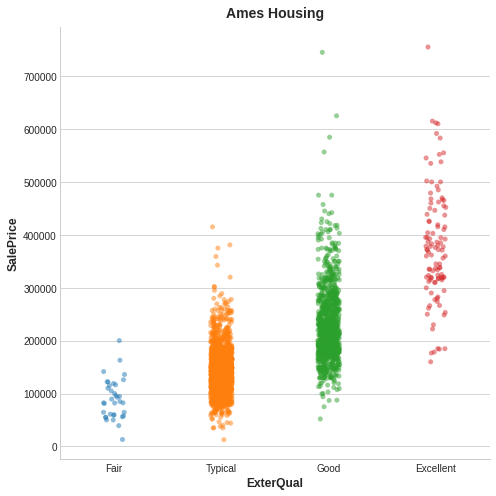

In [32]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/Colab Notebooks/data/mutual_information_image.png')

<p>Bir evin dış kalitesi(ExterQual) bilmek, satış fiyatı hakkında belirsizliği azaltır.</p>
<p>Şekilden, <code>ExterQual</code> değerini bilmenin, karşılık gelen <code>SalePrice</code> hakkında daha emin olmanızı sağlayacağını görebiliriz. <code>ExterQual</code>'ın her kategorisi, <code>SalePrice</code>'ı belirli bir aralıkta yoğunlaştırma eğilimindedir. <code>ExterQual</code> ile <code>SalePrice</code> arasındaki karşılıklı bilgi(mutual information), <code>ExterQual</code>'ın dört değerinde <code>SalePrice</code>'daki belirsizlik ortalama azalmasıdır. Örneğin, <code>Fair</code>,<code>Typical</code>'dan daha az sıklıkta ortaya çıktığı için, MI puanında daha az ağırlık alır.</p>

<br/>
<p>(Teknik not: Belirsizlik olarak adlandırdığımız şey, bilgi teorisinde "entropi" olarak bilinen bir miktar kullanılarak ölçülür. Bir değişkenin entropisi kabaca şu anlama gelir: "Bu değişkenin bir olayını tanımlamak için ortalama olarak kaç tane evet-hayır sorusu sormanız gerekir." Ne kadar çok soru sormanız gerekiyorsa, o değişken hakkında o kadar belirsiz olmalısınız. Karşılıklı bilgi, özelliğin hedef hakkında kaç soruya cevap vereceğini beklediğinizdir.)</p>

<h3>Karşılıklı Bilgi Puanlarını Yorumlama</h3>
<p>Miktarlar arasındaki en düşük karşılıklı bilgi 0,0'dır. MI sıfır olduğunda, miktarlar bağımsızdır: hiçbiri diğeri hakkında bilgi vermez. Tersine, teorik olarak MI'nın üst sınırı yoktur. Ancak pratikte 2,0'ın üzerindeki değerler nadirdir. (Karşılıklı bilgi logaritmik bir miktardır. Bu nedenle çok yavaş artar.)</p>
<br/>
<p>Bir sonraki şekil, MI değerlerinin bir özelliğin hedefle olan ilişkisinin türü ve derecesine karşılık geldiğine dair bir fikir verecektir. </p>

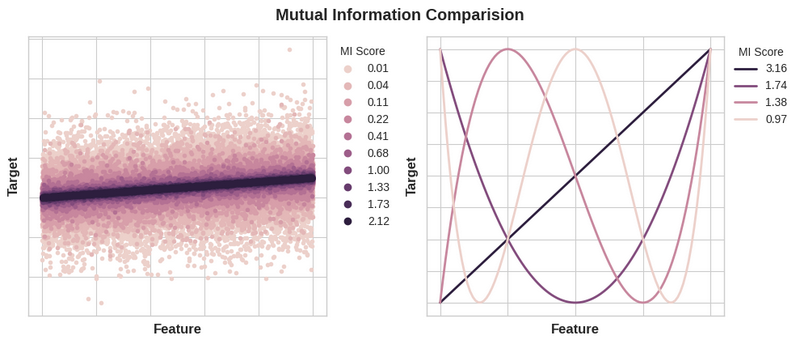

In [33]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/Colab Notebooks/data/Screenshot 2025-11-26 at 21-47-19 Mutual Information.png')

<p><b>Sol</b>: Özellik ve hedef arasındaki bağımlılık arttıkça karşılıklı bilgi de artar. <b>Sağ</b>: Karşılıklı bilgi , her türlü ilişkiyi(sadece korelasyon olanları değil) yakalayabilir.</p>

<br/>
<p>Karşılıklı bilgiyi uygularken hatırlanması gereken bazı noktalar şunlardır:</p>
<ul>
  <li>MI, bir özelliğin hedef için tek başına bir tahminci olarak göreceli potansiyelini anlamanıza yardımcı olabilir.</li>
  <li>Bir özellik, diğer özelliklerle etkileşim halindeyken ok bilgilendirici olabilir, ancak tek başına o kadar bilgilendirici olmayabilir. MI, özellikler arasındaki etkileşimleri algılamaz. Bu <b>tek değişkenli</b> metriktir.</li>
  <li>Bir özelliğin gerçek yararı, onu kullandığınız modele bağlıdır. Bir özellik, yalnızca hedefle olan ilişkisi modelinizin öğrenebileceği ölçüde yararlıdır. Bir özelliğin MI puanı yüksek olması, modelinizin bu bilgiyle bir şey yapabileceği anlamına gelmez. İlişkiyi ortaya çıkarmak için önce özelliği dönüştürmeniz gerekebilir. </li>
</ul>

<h3>Örneğin - 1985 Otomobilleri</h3>
<p>Otomobil veri kümesi, 1985 model yılına ait 193 otomobilden oluşmaktadır. Bu veri kümesinin amacı, otomobilin markası , gövde stili ve beygir gücü gibi 23 özelliğinden otomobil fiyatını(hedef - target) tahmin etmektir. Bu örnekte, özellikleri karşılıklı bilgi ile sıralayacağız ve sonuçları veri görselleştirme ile inceleyeceğiz.</p>

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Eski 'seaborn-whitegrid' stil adı artık doğrudan kullanılamıyor olabilir.
# Alternatif olarak 'seaborn-v0_8-whitegrid' veya 'ggplot' gibi geçerli bir stil kullanın.
# Veya plt.style.available komutunu kullanarak mevcut stilleri kontrol edebilirsiniz.
plt.style.use("seaborn-v0_8-whitegrid") # Güncel ve benzer bir stil ile değiştirildi


df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/autos.csv")
df.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


MI için scikit-learn algoritması, kesikli özellikleri sürekli özelliklerden farklı şekilde ele alır. Sonuç olarak, hangisinin hangisi olduğunu belirtmeniz gerekir. Genel bir kural olarak, `float` dtype olması gereken hiçbirşey kesikli değildir. `Kategorik` değişkenler(`nesne` veya `kategorik` dtype), onlara bir etiket kodlaması atanarak kesikli olarak ele alınır.

In [35]:
X = df.copy()
y = X.pop("price")

#Label encoding for categorical data
for colname in df.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()


discrete_features = X.dtypes == int

Scikit-learn, `feature_selection` modülünde iki karşılıklı bilgi metriğine sahiptir: biri gerçek değerli hedefler için(mutual_info_regression), diğeri kategorik hedefler için(mutual_info_classif). Hedefimiz olan fiyat, gerçek değerlidir. bir sonraki hücre, özelliklerimizin MI puanlarını hesaplar ve bunları güzel bir veri çerçevesine yerleştirir.

In [36]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]


,MI Scores
curb_weight,1.554239
highway_mpg,0.949391
length,0.615174
bore,0.490266
stroke,0.388672
num_of_cylinders,0.333249
compression_ratio,0.135564
fuel_type,0.047298


Ve şimdi karşılaştırmaları kolaylaştırmak için bir çubuk grafik:

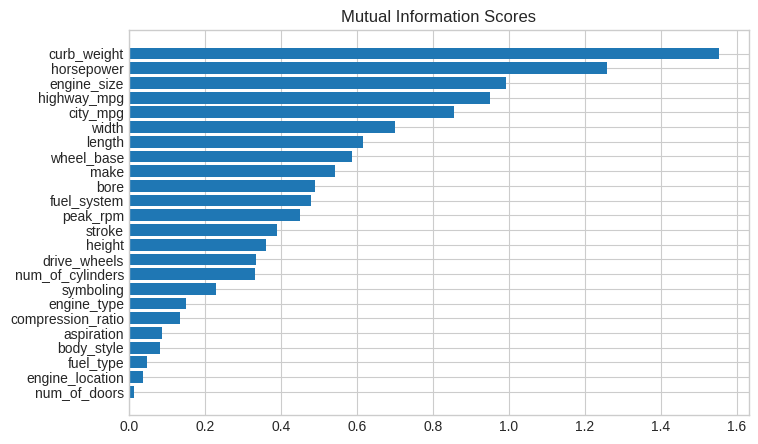

In [37]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

Veri görselleştirme, yardımcı program sıralamasının harika bir devamıdır. Bunlardan birkaçına daha yakından bakalım.


Beklenebileceği gibi, yüksek puan alan <code>curb_weight</code> özelliği, hedef olan <code>price</code> ile güçlü bir ilişki sergilemektedir.

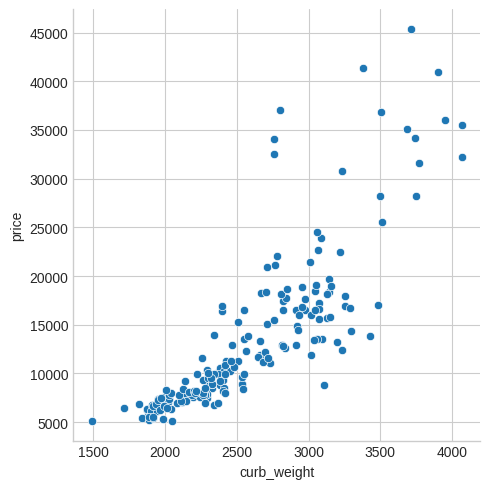

In [38]:
sns.relplot(x="curb_weight", y="price", data=df);


`fuel_type` özelliği oldukça düşük bir MI puanına sahiptir, ancak şekilde de görebileceğimiz gibi, `beygir gücü` özelliği içinde farklı eğilimlere sahip iki fiyat grubunu açıkça ayırmaktadır. Bu, `fuel_type`'ın bir etkileşim etkisine katkıda bulunduğunu ve sonuçta önemsiz olmayabileceğini göstermektedir. Bir özelliğin MI puanından önemsiz olduğuna karar vermeden önce, olası etkileşim etkilerini araştırmak iyi bir fikirdir. Bu konuda alan bilgisi çok yardımcı olabilir.


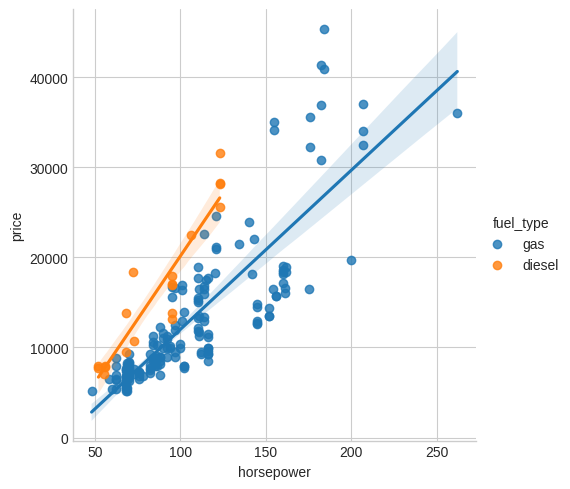

In [39]:
sns.lmplot(x="horsepower", y="price", hue="fuel_type", data=df);